In [23]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from pandas.plotting import scatter_matrix

In [67]:
data_path = "C:/Users/srava/Desktop/UTD_Files/03_Intern/Mpower/Merged_Data.csv"
LoanData = pd.read_csv(data_path)

In [68]:
LoanData = LoanData.drop(columns=['Loan Number', 'Tell Us About You'])
LoanData

,Has SSN,US Citizen,Enrollment Status,STEM,Credit Score 1,Credit Score 2,GPA,Approved Loan Amount,Interest Rate,Test Loan,Early Risk Score
0,Yes,False,2nd Year Graduate,No,630.0,0.0,3.74,15500.0,11.99,0,0.0
1,Yes,True,4th Year Undergraduate,No,536.0,NaN,3.20,10000.0,9.99,0,NaN
2,Yes,False,2nd Year Graduate,No,644.0,NaN,3.86,10446.0,11.99,0,0.0
3,Yes,False,4th Year Undergraduate,No,688.0,NaN,3.20,15000.0,13.99,0,0.0
4,No,False,1st Year Graduate,No,NaN,NaN,0.00,7000.0,11.99,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
1024,Yes,False,3rd Year Graduate,No,606.0,0.0,3.90,10500.0,11.99,0,0.0
1025,Yes,False,2nd Year Graduate,No,764.0,0.0,3.78,8000.0,11.99,0,0.0
1026,No,False,2nd Year Graduate,No,687.0,NaN,0.00,25000.0,11.99,0,0.0
1027,No,False,1st Year Graduate,No,NaN,0.0,0.00,4000.0,11.99,0,0.0


In [69]:
# information about missing values in dataset
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 11 columns):
Has SSN                 1029 non-null object
US Citizen              1029 non-null bool
Enrollment Status       1029 non-null object
STEM                    986 non-null object
Credit Score 1          469 non-null float64
Credit Score 2          684 non-null float64
GPA                     1029 non-null float64
Approved Loan Amount    1029 non-null float64
Interest Rate           1029 non-null float64
Test Loan               1029 non-null int64
Early Risk Score        976 non-null float64
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 81.5+ KB


In [70]:
# numerical and categorical variables
numerical_features_df = LoanData.select_dtypes(include=[np.number])
categorical_features_df = LoanData.select_dtypes(include=[np.object])
print('Total number of numerical features =  ', len(numerical_features_df.columns))
print('Total number of categorical features = ', len(categorical_features_df.columns))

Total number of numerical features =   7
Total number of categorical features =  3


In [71]:
# Checking for skewness
from scipy.stats import skew 
skewness = numerical_features_df.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

Test Loan               12.980981
GPA                     -0.077596
Interest Rate           -0.390218
Approved Loan Amount    -0.465246
Credit Score 1                NaN
Credit Score 2                NaN
Early Risk Score              NaN
dtype: float64

In [ ]:
# Impute missing values in Credit Score 1 and Credit Score 2 with median
numerical_features_df['Credit Score 1'].fillna(numerical_features_df['Credit Score 1'].median())
numerical_features_df['Credit Score 2'].fillna(numerical_features_df['Credit Score 2'].median())

In [73]:
#heatmap

corr = numerical_features_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Credit Score 1,Credit Score 2,GPA,Approved Loan Amount,Interest Rate,Test Loan,Early Risk Score
Credit Score 1,1,-0.0444432,-0.093599,0.179089,0.0501465,-0.0345039,-0.0103372
Credit Score 2,-0.0444432,1,0.0513704,-0.0367086,-0.0343707,-0.0312368,-0.0200967
GPA,-0.093599,0.0513704,1,-0.233784,0.12681,-0.0176386,-0.0206063
Approved Loan Amount,0.179089,-0.0367086,-0.233784,1,0.0623103,0.0502355,-0.0204821
Interest Rate,0.0501465,-0.0343707,0.12681,0.0623103,1,-0.0649136,-0.0137263
Test Loan,-0.0345039,-0.0312368,-0.0176386,0.0502355,-0.0649136,1,-0.0264083
Early Risk Score,-0.0103372,-0.0200967,-0.0206063,-0.0204821,-0.0137263,-0.0264083,1


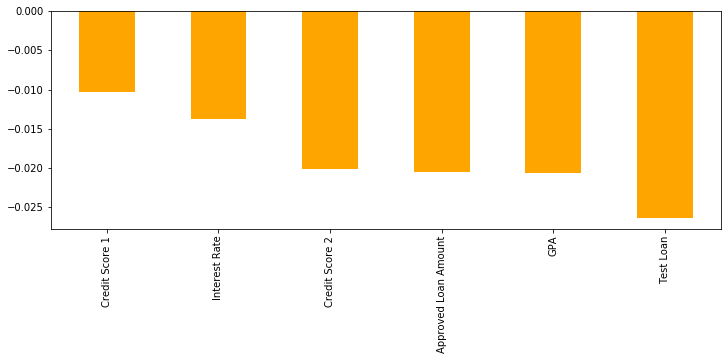

In [74]:
#bar plot of highly correlated variables with target variable

numerical_features_df.corr()['Early Risk Score'].sort_values(ascending=False).iloc[1:].plot(kind='bar', figsize=(12, 4), color='orange')
plt.show()

In [75]:
NewData = pd.get_dummies(LoanData, columns=['US Citizen','STEM','Has SSN'])

In [78]:
#heatmap
corr = NewData.corr()
corr.style.background_gradient()

,Credit Score 1,Credit Score 2,GPA,Approved Loan Amount,Interest Rate,Test Loan,Early Risk Score,US Citizen_False,US Citizen_True,STEM_No,STEM_Yes,Has SSN_No,Has SSN_Yes
Credit Score 1,1,-0.0444432,-0.093599,0.179089,0.0501465,-0.0345039,-0.0103372,0.105401,-0.105401,-0.000579731,-0.0174675,-0.101147,0.101147
Credit Score 2,-0.0444432,1,0.0513704,-0.0367086,-0.0343707,-0.0312368,-0.0200967,0.0870492,-0.0870492,0.00407906,0.0225933,0.0592777,-0.0592777
GPA,-0.093599,0.0513704,1,-0.233784,0.12681,-0.0176386,-0.0206063,-0.0602791,0.0602791,-0.0662417,0.0674946,-0.289231,0.289231
Approved Loan Amount,0.179089,-0.0367086,-0.233784,1,0.0623103,0.0502355,-0.0204821,0.172621,-0.172621,-0.0611171,0.0658445,0.215779,-0.215779
Interest Rate,0.0501465,-0.0343707,0.12681,0.0623103,1,-0.0649136,-0.0137263,0.579768,-0.579768,-0.144618,0.17727,-0.0132207,0.0132207
Test Loan,-0.0345039,-0.0312368,-0.0176386,0.0502355,-0.0649136,1,-0.0264083,-0.0385481,0.0385481,-0.000633393,0.00772748,0.0147808,-0.0147808
Early Risk Score,-0.0103372,-0.0200967,-0.0206063,-0.0204821,-0.0137263,-0.0264083,1,-0.0488049,0.0488049,0.0539638,-0.082121,0.054107,-0.054107
US Citizen_False,0.105401,0.0870492,-0.0602791,0.172621,0.579768,-0.0385481,-0.0488049,1,-1,-0.0470609,0.0746499,0.0993464,-0.0993464
US Citizen_True,-0.105401,-0.0870492,0.0602791,-0.172621,-0.579768,0.0385481,0.0488049,-1,1,0.0470609,-0.0746499,-0.0993464,0.0993464
STEM_No,-0.000579731,0.00407906,-0.0662417,-0.0611171,-0.144618,-0.000633393,0.0539638,-0.0470609,0.0470609,1,-0.906606,0.0605587,-0.0605587


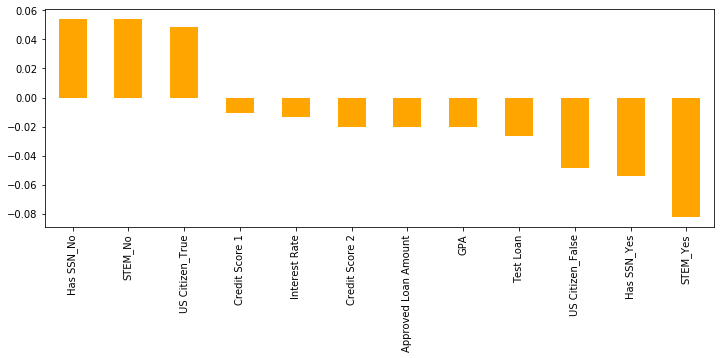

In [79]:
#bar plot of highly correlated variables with target variable

NewData.corr()['Early Risk Score'].sort_values(ascending=False).iloc[1:].plot(kind='bar', figsize=(12, 4), color='orange')
plt.show()